In [1302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1303]:
df_train = pd.read_csv(r"C:\Kaggle\house-prices-advanced-regression-techniques\train.csv")
df_test = pd.read_csv(r"C:\Kaggle\house-prices-advanced-regression-techniques\test.csv")

In [1304]:
df = pd.concat([df_train, df_test]).reset_index(drop=True).copy()

In [1305]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [1306]:
df.shape

(2919, 81)

In [1307]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [1308]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [1309]:
df.columns[df.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SalePrice'],
      dtype='object')

In [1310]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [1311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [1312]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 81, dtype: object

In [1313]:
df.columns[df.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SalePrice'],
      dtype='object')

In [1314]:
df.isnull().sum().sort_values(ascending=False)[:36]

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageYrBlt      159
GarageFinish     159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Utilities          2
Functional         2
BsmtFullBath       2
BsmtHalfBath       2
GarageArea         1
BsmtFinSF2         1
Exterior1st        1
TotalBsmtSF        1
GarageCars         1
BsmtUnfSF          1
Electrical         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
Exterior2nd        1
Street             0
dtype: int64

In [1315]:
df["PoolQC"] = df["PoolQC"].fillna("None")

In [1316]:
df["Functional"]

0       Typ
1       Typ
2       Typ
3       Typ
4       Typ
       ... 
2914    Typ
2915    Typ
2916    Typ
2917    Typ
2918    Typ
Name: Functional, Length: 2919, dtype: object

In [1317]:
df["Functional"].mode()[0]

'Typ'

In [1318]:
df["Functional"].mode()

0    Typ
dtype: object

In [1319]:
df["Functional"] = df["Functional"].fillna(df_train["Functional"].mode()[0])

In [1320]:
df["LotFrontage"] = df["LotFrontage"].fillna(df_train["LotFrontage"].mean()) 

In [1321]:
df["MiscFeature"] = df["MiscFeature"].fillna("None")

In [1322]:
df.Fence.value_counts()

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [1323]:
df["Fence"] = df["Fence"].fillna("None")

In [1324]:
df["FireplaceQu"] = df["FireplaceQu"].fillna("None")

In [1325]:
df["GarageCond"] = df["GarageCond"].fillna("None")

In [1326]:
df["GarageYrBlt"] = df["GarageYrBlt"].fillna("None")

In [1327]:
df["GarageFinish"] = df["GarageFinish"].fillna("None")

In [1328]:
df["GarageQual"] = df["GarageQual"].fillna("None")

In [1329]:
df["GarageType"] = df["GarageType"].fillna("None")

In [1330]:
df["BsmtExposure"] = df["BsmtExposure"].fillna("None")

In [1331]:
df["BsmtCond"] = df["BsmtCond"].fillna("None")

In [1332]:
df["BsmtQual"] = df["BsmtQual"].fillna("None")

In [1333]:
df["BsmtFinType2"] = df["BsmtFinType2"].fillna("None")

In [1334]:
df["BsmtFinType1"] = df["BsmtFinType1"].fillna("None")

In [1335]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")

In [1336]:
df["MasVnrArea"] = df["MasVnrArea"].fillna(0.0)

In [1337]:
df["MSZoning"] = df["MSZoning"].fillna("None")

In [1338]:
df.BsmtFullBath.value_counts()

0.0    1705
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64

In [1339]:
df["BsmtFullBath"] = df["BsmtFullBath"].fillna(0.0)

In [1340]:
df.BsmtHalfBath.value_counts()

0.0    2742
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

In [1341]:
df["BsmtHalfBath"] = df["BsmtHalfBath"].fillna(0.0)

In [1342]:
df["Utilities"] = df["Utilities"].fillna("None")

In [1343]:
df.BsmtUnfSF.value_counts()

0.0       241
384.0      19
728.0      14
672.0      13
600.0      12
         ... 
1503.0      1
445.0       1
958.0       1
1559.0      1
1369.0      1
Name: BsmtUnfSF, Length: 1135, dtype: int64

In [1344]:
df["BsmtUnfSF"] = df["BsmtUnfSF"].fillna(0.0)

In [1345]:
df.GarageArea.value_counts()

0.0      157
576.0     97
440.0     96
240.0     69
484.0     68
        ... 
443.0      1
424.0      1
263.0      1
962.0      1
803.0      1
Name: GarageArea, Length: 603, dtype: int64

In [1346]:
df["GarageArea"] = df["GarageArea"].fillna(0.0)

In [1347]:
df.GarageCars.value_counts()

2.0    1594
1.0     776
3.0     374
0.0     157
4.0      16
5.0       1
Name: GarageCars, dtype: int64

In [1348]:
df["GarageCars"] = df["GarageCars"].fillna(0.0)

In [1349]:
df.TotalBsmtSF.value_counts()

0.0       78
864.0     74
672.0     29
912.0     26
1040.0    25
          ..
1949.0     1
1231.0     1
1829.0     1
1475.0     1
1243.0     1
Name: TotalBsmtSF, Length: 1058, dtype: int64

In [1350]:
df["TotalBsmtSF"] = df["TotalBsmtSF"].fillna(0.0)

In [1351]:
df.Exterior1st.value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
CBlock        2
AsphShn       2
Stone         2
ImStucc       1
Name: Exterior1st, dtype: int64

In [1352]:
df["Exterior1st"] = df["Exterior1st"].fillna("None")

In [1353]:
df.BsmtFinSF2.value_counts()

0.0      2571
294.0       5
180.0       5
162.0       3
539.0       3
         ... 
196.0       1
904.0       1
456.0       1
624.0       1
823.0       1
Name: BsmtFinSF2, Length: 272, dtype: int64

In [1354]:
df["BsmtFinSF2"] = df["BsmtFinSF2"].fillna(0.0)

In [1355]:
df.BsmtFinSF1.value_counts()

0.0       929
24.0       27
16.0       14
300.0       9
288.0       8
         ... 
1022.0      1
939.0       1
1124.0      1
1619.0      1
1106.0      1
Name: BsmtFinSF1, Length: 991, dtype: int64

In [1356]:
df["BsmtFinSF1"] = df["BsmtFinSF1"].fillna(0.0)

In [1357]:
df.Exterior2nd.value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [1358]:
df["Exterior2nd"] = df["Exterior2nd"].fillna("Other")

In [1359]:
df.SaleType.value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [1360]:
df["SaleType"] = df["SaleType"].fillna("Oth")

In [1361]:
df.Electrical.value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [1362]:
df["Electrical"] = df["Electrical"].fillna("SBrkr")

In [1363]:
df.KitchenQual.value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [1364]:
df["KitchenQual"] = df["KitchenQual"].fillna("TA")

In [1365]:
df.Alley.value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [1366]:
df["Alley"] = df["Alley"].fillna("None")

In [1367]:
diction = {"None" : 0, "Grvl" : 1, "Pave" : 2}

In [1368]:
df['Alley'] = df['Alley'].replace(diction)

<AxesSubplot:>

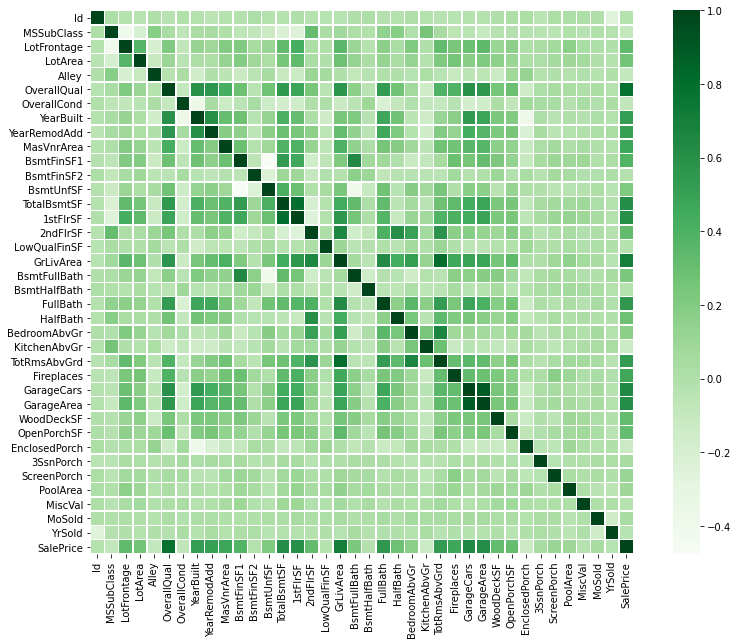

In [1369]:
corr_matrix = df.corr()
plt.subplots(figsize=(14, 10))
sns.heatmap(corr_matrix, linewidths=.5, square=True, annot=False, cmap="Greens")

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

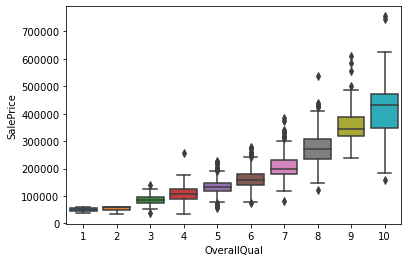

In [1370]:
sns.boxplot(x=df["OverallQual"], y=df["SalePrice"])

In [1371]:
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).copy().columns.tolist())

C:\Users\tcedeniz\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

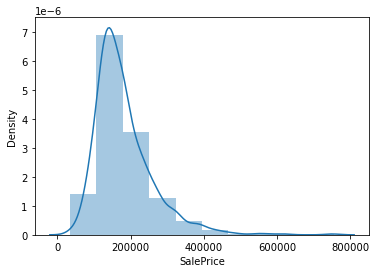

In [1372]:
sns.distplot(df["SalePrice"], bins=10)

In [1373]:
df['SalePrice'].skew()

1.8828757597682129

In [1374]:
df["SalePrice"] = np.log(df["SalePrice"])

In [1375]:
df['SalePrice'].skew()

0.12133506220520401

C:\Users\tcedeniz\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

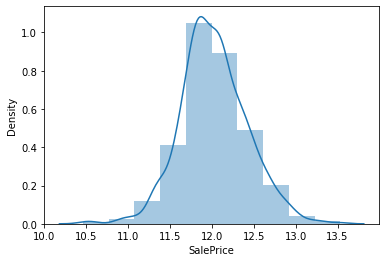

In [1376]:
sns.distplot(df["SalePrice"], bins=10)

scaler = StandardScaler()
df = scaler.fit(df)

In [1377]:
df_train = df[df["SalePrice"].notnull()].copy()
df_test  = df[df["SalePrice"].isnull()].copy()

In [1378]:
Id = df_test.pop("Id")

In [1379]:
df_train = df_train.drop(["Id"], axis=1)

In [1380]:
df_train.shape

(1460, 407)

In [1381]:
df_test.shape

(1459, 407)

In [1382]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,0.090411,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,0.003425,0.083562,0.002055,0.867808,0.069178,0.002740,0.008219,0.013699,0.820548,0.085616
std,42.300571,22.024023,9981.264932,0.372151,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,0.058440,0.276824,0.045299,0.338815,0.253844,0.052289,0.090317,0.116277,0.383862,0.279893
min,20.000000,21.000000,1300.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7553.500000,0.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,70.049958,9478.500000,0.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,79.000000,11601.500000,0.000000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,313.000000,215245.000000,2.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1383]:
df_test.describe()

,MSSubClass,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.809007,9819.161069,0.098698,6.078821,5.553804,1971.357779,1983.662783,99.673749,438.902673,...,0.002056,0.080192,0.003427,0.862234,0.061001,0.005483,0.008225,0.017820,0.825223,0.082248
std,42.746880,20.568131,4955.517327,0.373861,1.436812,1.113740,30.390071,21.130467,177.001792,455.257119,...,0.045314,0.271683,0.058460,0.344772,0.239414,0.073871,0.090348,0.132344,0.379907,0.274837
min,20.000000,21.000000,1470.000000,0.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,60.000000,7391.000000,0.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,70.049958,9399.000000,0.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,78.000000,11517.500000,0.000000,7.000000,6.000000,2001.000000,2004.000000,162.000000,752.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,200.000000,56600.000000,2.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1384]:
y = df_train.pop("SalePrice")

In [1385]:
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [1386]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#Import the Regression Models you choose 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model



#At first, create the Pipeline with any estimator
pipe = Pipeline([('estimator', BayesianRidge())])


#Create a parameters dictionary for each estimator
params_grid = [{
                'estimator':[BayesianRidge()],
                 "estimator__n_iter":[300, 400, 500] #Bayesian Ridge "n_iter" diye bir parametreye sahip, onu deniyoruz
                },
                {
                'estimator': [LinearRegression()],
                "estimator__normalize":[False, True] #Linear Regression "normalize" diye bir parametreye sahip, onu dene
                },    
                {
                "estimator": [linear_model.ARDRegression()]
                }
    
               # {'estimator':[Any estimator],
               #  'estimator__ParameterNAME':[Value you would like to try]}  
           ]
grid = GridSearchCV(pipe, params_grid)

In [1387]:
grid.fit(df_train, y)  #grid search fits for every estimator with given parameters 

GridSearchCV(estimator=Pipeline(steps=[('estimator', BayesianRidge())]),
             param_grid=[{'estimator': [BayesianRidge()],
                          'estimator__n_iter': [300, 400, 500]},
                         {'estimator': [LinearRegression()],
                          'estimator__normalize': [False, True]},
                         {'estimator': [ARDRegression()]}])

In [1388]:
grid.best_params_       #It shows the best parameters 

{'estimator': BayesianRidge(), 'estimator__n_iter': 300}

In [1389]:
grid.cv_results_        #Results for every parameters

{'mean_fit_time': array([0.39546137, 0.49425802, 0.4102088 , 0.19938474, 0.19070163,
        1.6502677 ]),
 'std_fit_time': array([0.01620151, 0.08061784, 0.02976019, 0.02071578, 0.00485806,
        0.31651371]),
 'mean_score_time': array([0.00972772, 0.01064744, 0.01041999, 0.00541086, 0.00518241,
        0.00622296]),
 'std_score_time': array([3.28252606e-03, 2.09214625e-03, 1.65723898e-03, 2.56426044e-04,
        2.28254163e-04, 9.12226997e-05]),
 'param_estimator': masked_array(data=[BayesianRidge(), BayesianRidge(), BayesianRidge(),
                    LinearRegression(), LinearRegression(),
                    ARDRegression()],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_estimator__n_iter': masked_array(data=[300, 400, 500, --, --, --],
              mask=[False, False, False,  True,  True,  True],
        fill_value='?',
             dtype=object),
 'param_estimator__normalize': masked_array(data=[--,

In [1390]:
allscores = grid.cv_results_['mean_test_score']        #It shows only the Mean test score
print(allscores)    

[ 8.72516318e-01  8.72516318e-01  8.72516318e-01 -4.17858377e+08
 -3.32289770e+25  8.44891410e-01]


In [1391]:
grid.best_score_     #The best test score

0.8725163181149217

In [1392]:
grid.best_estimator_                 #Returns the best estimator

Pipeline(steps=[('estimator', BayesianRidge())])

In [1393]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

#Import the Regression Models you choose 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model



#Pipeline flows that order: Scale the data with standardscaler then use the given estimator
pipe = Pipeline([("SCALER", StandardScaler()), 
                 ('estimator', BayesianRidge())])


#Create a parameters dictionary for each estimator
params_grid = [{
                'estimator':[BayesianRidge()],
                 "estimator__n_iter":[300, 400, 500] # n_iter is the Maximum number of iterations
                },
                {
                'estimator': [LinearRegression()],
                "estimator__normalize":[False, True] # Normalize or not? 
                },    
                {
                "estimator": [linear_model.ARDRegression()]
                }
    
               # {'estimator':[Any estimator],
               #  'estimator__ParameterNAME':[Value you would like to try]}  
              ]

grid = GridSearchCV(pipe, params_grid)

In [1394]:
grid.fit(df_train, y)  #grid search fits for every estimator with given parameters 

GridSearchCV(estimator=Pipeline(steps=[('SCALER', StandardScaler()),
                                       ('estimator', BayesianRidge())]),
             param_grid=[{'estimator': [BayesianRidge()],
                          'estimator__n_iter': [300, 400, 500]},
                         {'estimator': [LinearRegression()],
                          'estimator__normalize': [False, True]},
                         {'estimator': [ARDRegression()]}])

In [1395]:
grid.best_params_       #It shows the best parameters 

{'estimator': BayesianRidge(), 'estimator__n_iter': 300}

In [1396]:
grid.best_estimator_                 #Returns the best estimator

Pipeline(steps=[('SCALER', StandardScaler()), ('estimator', BayesianRidge())])

In [1397]:
clf = grid.best_estimator_

In [1398]:
df_test  = df_test.drop("SalePrice", axis=1).reset_index(drop=True)

In [1399]:
y_pred = clf.predict(df_test)

In [1400]:
my_prediction = np.expm1(y_pred)

In [1401]:
submission = pd.DataFrame()
submission["Id"] = Id
submission["SalePrice"] = my_prediction
submission.head()

,Id,SalePrice
1460,1461,120031.913161
1461,1462,148482.536119
1462,1463,183026.060197
1463,1464,200896.374065
1464,1465,186319.100979


In [1402]:
submission.to_csv(r"C:\Kaggle\house-prices-advanced-regression-techniques\Submission.csv", index=False)